# STUDENT PERFORMER INDICATOR

1. understanding the problem statement
2. data collection
3. data checks to perform
4. EDA
5. data pre-processing
6. model training
7. chose the best model

# PROBLEM STATEMENT:

The problem statement shows how the student's performance (testscores) is affected by other variables such as gender, ethnicuty, parental level of education , Lunch and Test preparation course.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# DATA CHECKS TO PERFORM

- checking the missing values
- check duplicates
- check data types
- check the number of unique values of each column
- check the statistics of data set
- check various categories present in different categorical column

In [5]:
# check the missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
df.duplicated().sum()

# if there any remove them 

np.int64(0)

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# EXPLORING DATA

In [12]:
print("categorires in gender variable: ",end=" ")
print(df['gender'].unique())

print("categorires in race/ethenicity variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("categorires in parential level variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("categorires in lunch variable: ",end=" ")
print(df['lunch'].unique())

print("categorires in test preparation variable: ",end=" ")
print(df['test_preparation_course'].unique())

categorires in gender variable:  <StringArray>
['female', 'male']
Length: 2, dtype: str
categorires in race/ethenicity variable:  <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
categorires in parential level variable:  <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
categorires in lunch variable:  <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
categorires in test preparation variable:  <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [16]:
#define numerical and categorical variables

numerical_var = [feature for feature in df.columns if df[feature].dtype != 'str']
categorical_var = [feature for feature in df.columns if df[feature].dtype == 'str']

#print columns

print("we have {} numerical variables : {}".format(len(numerical_var),numerical_var))
print("we have {} categorical variables : {}".format(len(categorical_var),categorical_var))

we have 3 numerical variables : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical variables : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# adding total for total score and average

In [17]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_score = df[df['reading_score'] == 100]['average_score'].count()
writing_score = df[df['writing_score'] == 100]['average_score'].count()
math_full_score = df[df['math_score'] == 100]['average_score'].count()

print("number of students who got full score in reading : ",reading_score)
print("number of students who got full score in writing : ",writing_score)
print("number of students who got full score in math : ",math_full_score)

number of students who got full score in reading :  17
number of students who got full score in writing :  14
number of students who got full score in math :  7


In [20]:
reading_score_20 = df[df['reading_score'] <= 20].count()
writing_score_20 = df[df['writing_score'] <= 20].count()
math_score_20 = df[df['math_score'] <= 20].count()

print("number of students who got less than or equal 20 in reading : ",reading_score_20['average_score'])
print("number of students who got less than or equal 20 in writing : ",writing_score_20['average_score'])
print("number of students who got less than or equal 20 in math : ",math_score_20['average_score'])

number of students who got less than or equal 20 in reading :  1
number of students who got less than or equal 20 in writing :  3
number of students who got less than or equal 20 in math :  4


- as per above student are worst in maths and good in reading

# exploring the data

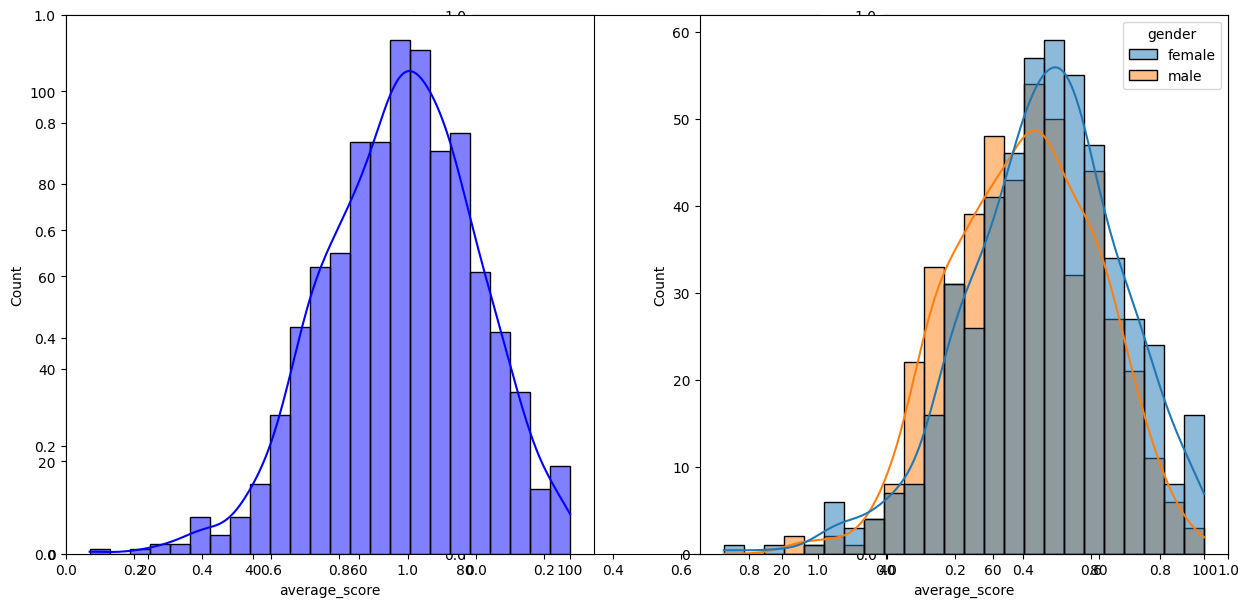

In [22]:
# histogram and kde

fig,axes = plt.subplots(1,3,figsize=(15,7))
plt.subplot(121)
sns.histplot(data =df,x='average_score',kde=True,color='blue')
plt.subplot(122)
sns.histplot(data =df,x='average_score',kde=True,hue='gender')
plt.show()

- above graph tells that female are good in studies

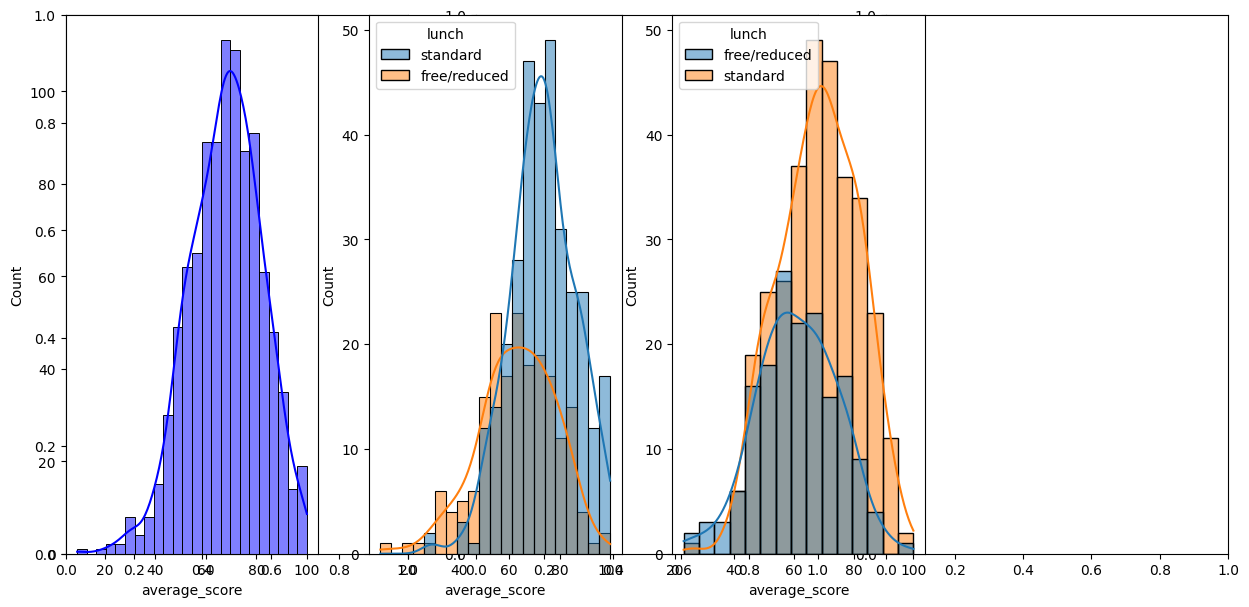

In [25]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df, x='average_score',kde=True,color='blue')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score',kde=True,hue='lunch')
plt.show()